Importamos modulos y archivos necesarios

In [ ]:
import matplotlib.pyplot as plt
import cv2
from scipy import signal
import numpy as np

# My alias

In [ ]:
xsize = 512
ysize = 512
alpha1 = -np.pi/6
alpha2 = np.pi/6
f1 = 75
f2 = 75
a1 = 1
a2 = 1
phase1 = 0
phase2 = 0 

In [ ]:

X, Y = np.meshgrid( np.linspace(0,1,xsize), np.linspace(0,1,ysize))

In [ ]:
grid1 = np.cos(alpha1)*X + np.sin(alpha1)*Y
grid2 = np.cos(alpha2)*X + np.sin(alpha2)*Y

realizamos una imagen con cierta frecuencia espacial en diagonal con direccion noreste

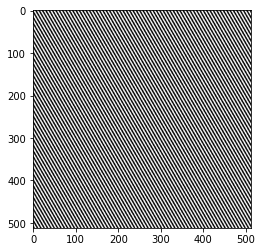

In [ ]:
im = np.zeros((xsize,ysize))
im = np.sign(a1*np.sin(2*np.pi*f1*grid1 + phase1))
plt.imshow(im,cmap='gray', vmin = im.min(), vmax = im.max()) 

realizamos una imagen con la misma frecuencia espacial en diagonal con direccion al noroeste

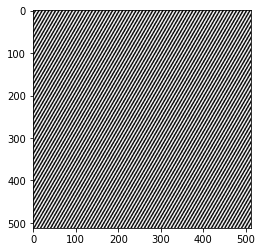

In [ ]:
im = np.sign(a2*np.sin(2*np.pi*f2*grid2 + phase2))
plt.imshow(im,cmap='gray', vmin = im.min(), vmax = im.max()) 

En el espectro se ven 2 constelaciones con mas brillo que las otras que serian las dos frecuencias que pusimos

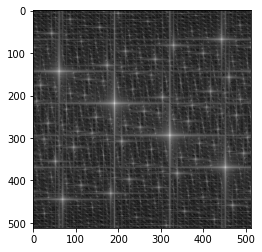

In [ ]:
IM = np.fft.fftshift(np.fft.fft2(im))

IMmod = np.abs(IM)
IMd = np.log10(1+IMmod)
plt.imshow(IMd,cmap='gray', vmin = IMd.min(), vmax = IMd.max()) 

Si bien el espectro muestra dos "deltas" en frecuencia, lo cual en principio estaria bien porque son las dos deltas que representan un seno, podemos observar que tambien hay otras frecuencias en el espectro. Esto se debe a que se ventaneo con una ventana rectangular y hay fuga espectral por la convolucion en el espectro de la sinc por la ventana rectangular y los deltas.

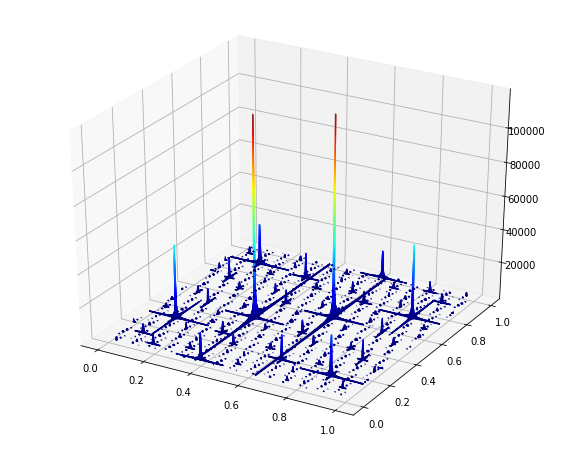

In [ ]:
plt.figure(figsize =(10, 8)) 
ax = plt.axes(projection='3d')
ax.contour3D(X, Y, IMmod, 1000, cmap='jet')